## Imports

In [1]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from argoverse.visualization.visualize_sequences import viz_sequence
from argoverse.map_representation.map_api import ArgoverseMap

## Data loading and explore

In [2]:
# root_dir set to dataset folder
root_dir = '../LaneGCN/dataset/val/data/'
afl = ArgoverseForecastingLoader(root_dir)

In [3]:
# print number of sequences in given dataset
print('Total number of sequences:',len(afl))

Total number of sequences: 39472


In [4]:
# iterating through the dataset
seq_data = afl[100]
print("Trajectory length of agent to be tracked: ", len(seq_data.agent_traj), "\n")
print("City of seq_data: ", seq_data.city, "\n")
print("Seq_data Idx: ", seq_data.counter, "\n")
print("How many tracks of other objects: ", seq_data.num_tracks, "\n")
print("Sequence Data Frame: ", seq_data.seq_df, "\n")
print("Track ID list in Sequence Data", len(seq_data.track_id_list), "\n")

Trajectory length of agent to be tracked:  50 

City of seq_data:  PIT 

Seq_data Idx:  100 

How many tracks of other objects:  55 

Sequence Data Frame:           TIMESTAMP                              TRACK_ID OBJECT_TYPE  \
0     3.159703e+08  00000000-0000-0000-0000-000000000000          AV   
1     3.159703e+08  00000000-0000-0000-0000-000000022140      OTHERS   
2     3.159703e+08  00000000-0000-0000-0000-000000022142      OTHERS   
3     3.159703e+08  00000000-0000-0000-0000-000000022207      OTHERS   
4     3.159703e+08  00000000-0000-0000-0000-000000022206      OTHERS   
...            ...                                   ...         ...   
1639  3.159703e+08  00000000-0000-0000-0000-000000022377      OTHERS   
1640  3.159703e+08  00000000-0000-0000-0000-000000022380      OTHERS   
1641  3.159703e+08  00000000-0000-0000-0000-000000022379      OTHERS   
1642  3.159703e+08  00000000-0000-0000-0000-000000022484      OTHERS   
1643  3.159703e+08  00000000-0000-0000-0000-00000002

## Visualization

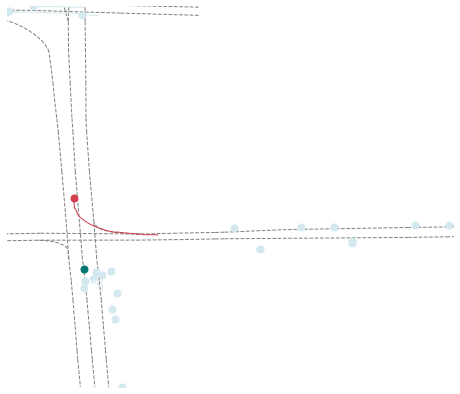

In [5]:
# visualize sequence with csv
seq_path = f"{root_dir}/2645.csv"
viz_sequence(afl.get(seq_path).seq_df, show=True)

## Maps

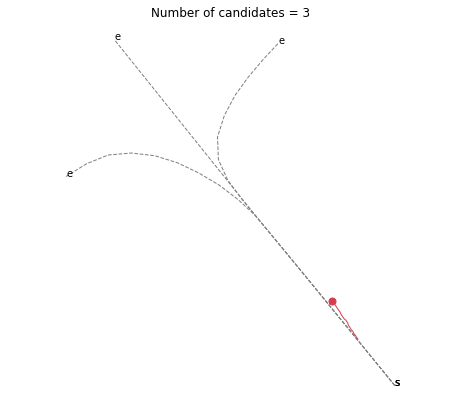

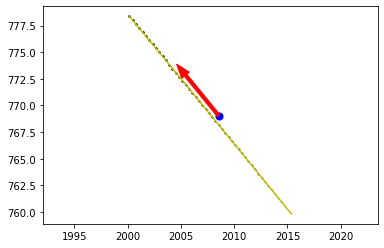

Neighboring lane ids: [9610789, 9614291, 9614306, 9617770]


In [6]:
avm = ArgoverseMap()
obs_len = 20
index = 100

seq_path = afl.seq_list[index]
agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]

# Get candidate centerline for an observed trajectory
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

# Get lane direction of a coordinate
lane_direction = avm.get_lane_direction(agent_obs_traj[-1], afl[index].city, visualize=True)

# Get lane-ids in a given x-y box
lane_ids = avm.get_lane_ids_in_xy_bbox(agent_obs_traj[0][0], agent_obs_traj[0][1], afl[index].city, 1)
print("Neighboring lane ids:", lane_ids)